<a href="https://colab.research.google.com/github/baboufragile/Jenkins/blob/master/Modeles_regression_EPSI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
pip install pydataset

     |████████████████████████████████| 15.9 MB 4.8 MB/s 
  Created wheel for pydataset: filename=pydataset-0.2.0-py3-none-any.whl size=15939432 sha256=d8b5d9618f9069639be86815e27d447d439d4f7c56f8060f1b7afc2711af0391
  Stored in directory: /root/.cache/pip/wheels/32/26/30/d71562a19eed948eaada9a61b4d722fa358657a3bfb5d151e2
Successfully built pydataset


In [ ]:
import pandas as pd
import numpy as np
from pydataset import data
from sklearn import datasets

import statsmodels.formula.api as smf
import statsmodels.api as sm

initiated datasets repo at: /root/.pydataset/


/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


## Exemple cours : Prédiction du sentiment de bien-être

Un des objectifs de l'étude dont est tiré cet exemple était de prédire le
sentiment de bien-être (mesuré par un score) sept ans après avoir quitte
l'Université, à partir de variables mesurées lorsque l'étudiant se trouvait à l'Université. Les données sont résumées dans le tableau ci-dessous.

In [ ]:
NbEnfU = [2,2,0,0,0,1,0,0,2,0]
BEU = [17,20,21,18,31,34,20,17,48,16]
NSE = [52,56,27,34,29,38,38,25,53,36]
BE = [21,26,37,40,35,37,35,26,42,38]

df = pd.DataFrame({'NbEnfU': NbEnfU, 'BEU': BEU, 'NSE': NSE, 'BE': BE})

df

,NbEnfU,BEU,NSE,BE
0,2,17,52,21
1,2,20,56,26
2,0,21,27,37
3,0,18,34,40
4,0,31,29,35
5,1,34,38,37
6,0,20,38,35
7,0,17,25,26
8,2,48,53,42
9,0,16,36,38


La variable à expliquer est le sentiment de bien-être (variable notée
"BE),
mesuré par un score, et les variables explicatives sont : le nombre d'enfants
lors de la scolarité à l'Université ("NbEnfU"), le sentiment de bien-être
mesuré au cours de la scolarité à l'Université ("BEU) et le niveau
socio-économique des parents ("NSE'), également mesuré par un score.
D'après le tableau des données, on a donc

In [ ]:
#Ecrire le nombre d'individus et les matrices Y et X
nbr_indiv = 10
X = pd.DataFrame({'Intercept':np.ones(10), 'NbEnfU': NbEnfU, 'BEU': BEU, 'NSE': NSE})
Y = BE

In [ ]:
X

,Intercept,NbEnfU,BEU,NSE
0,1.0,2,17,52
1,1.0,2,20,56
2,1.0,0,21,27
3,1.0,0,18,34
4,1.0,0,31,29
5,1.0,1,34,38
6,1.0,0,20,38
7,1.0,0,17,25
8,1.0,2,48,53
9,1.0,0,16,36


In [ ]:
#régression lineaire
import statsmodels.formula.api as smf

In [ ]:
#instanciation
# OLS = Ordinary Least Squares
reg = smf.ols('BE ~ NbEnfU + BEU + NSE', data = df)

In [ ]:
#lancement des calculs (apprentissage)
res = reg.fit()

In [ ]:
#résultats détaillés
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                     BE   R-squared:                       0.766
Model:                            OLS   Adj. R-squared:                  0.648
Method:                 Least Squares   F-statistic:                     6.530
Date:                Tue, 12 Apr 2022   Prob (F-statistic):             0.0256
Time:                        07:54:24   Log-Likelihood:                -25.767
No. Observations:                  10   AIC:                             59.53
Df Residuals:                       6   BIC:                             60.75
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      3.2195     11.563      0.278      0.7

/usr/local/lib/python3.7/dist-packages/scipy/stats/stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  "anyway, n=%i" % int(n))


In [ ]:
#paramètres estimés Beta chap
print('paramètres :\n',res.params,'\n')
#degrés de liberté du modèle
print('degrés de liberté :\n',res.df_model,'\n')

paramètres :
 Intercept     3.219481
NbEnfU      -12.056239
BEU           0.580325
NSE           0.641134
dtype: float64 

degrés de liberté :
 3.0 



In [ ]:
# Ecrire l'equation de regression
x1, x2, x3 = 0, 0, 0 
beta = res.params
y = beta[0]+beta[1]*x1+beta[2]*x2+beta[3]*x3

In [ ]:
y

3.219480556813032

A partir de cette équation, nous pouvons prédire le score de bien-être.
Considérons, par exemple, un ancien étudiant ayant eu, durant sa scolarité
à l'Université, 1 enfant, un score de bien-être de 30 et dont le niveau 
socio-économique des parents est égal à 50.

In [ ]:
# Ecrire le calcul
x1, x2, x3 = 1,30,50
y = beta[0]+beta[1]*x1+beta[2]*x2+beta[3]*x3
y
#res.params[0]+res.params[1]*1+res.params[2]*30+res.params[3]*50

40.6297201367916

In [ ]:
# permet d’extraire les valeurs prédites pour Y.
Y_chap = res.fittedvalues # OU res.predict()
print(Y_chap)

0    22.311520
1    26.617033
2    32.716941
3    35.463905
4    39.802464
5    35.257410
6    39.189093
7    29.113370
8    40.942742
9    35.585522
dtype: float64


In [ ]:
# calcul du vecteur Epsilon
# valeurs réelles - valeurs prédites
Y = df['BE']
eps = Y-Y_chap
print(eps)

0   -1.311520
1   -0.617033
2    4.283059
3    4.536095
4   -4.802464
5    1.742590
6   -4.189093
7   -3.113370
8    1.057258
9    2.414478
dtype: float64


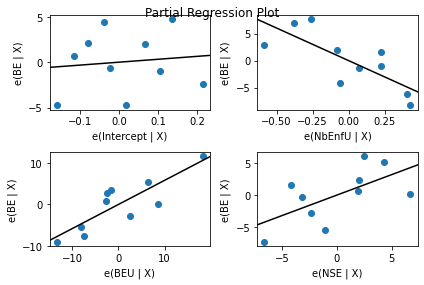

In [ ]:
import statsmodels.api as sm
fig = sm.graphics.plot_partregress_grid(res)
# ou fig = sm.graphics.plot_ccpr(res, "BEU") si on souhaite en obsever un en particulier

In [ ]:
#SCR
print('SCR :',res.ssr,'\n')
#SCE
print('SCE :',res.ess,'\n')
#SCT
print('SCT :',res.centered_tss,'\n')
#le R2
print('R2 :',res.rsquared,'\n')
#le R2 ajusté
print('R2 ajusté :',res.rsquared_adj,'\n')
# SCR divisé par le nombre de degrés de liberté des résidus.
print('mse_resid :',res.mse_resid,'\n')
# SCT divisé par somme des degrés de liberté des paramètres et des résidus
print('mse_total :',res.mse_total,'\n')
#calcul manuel de la statistique F à partir des carrés moyens
F = res.mse_model / res.mse_resid
print('calcul manuel du F :',F,'\n')
#la statistique F fourni par l'objet res
print('F fourni :',res.fvalue)

SCR : 101.31091725226275 

SCE : 330.7890827477372 

SCT : 432.09999999999997 

R2 : 0.7655382613925878 

R2 ajusté : 0.6483073920888818 

mse_resid : 16.885152875377127 

mse_total : 48.011111111111106 

calcul manuel du F : 6.530176445329718 

F fourni : 6.530176445329718


## Exercices

#### Exercice 1

Appliquez une régression linéaire sur la dataset « iris » dans le but de prévoir la largeur d’un iris.
<br>
Attention a la nature des variables.

In [24]:
from pydataset import data
iris = data('iris')
col = iris['Petal.Width']
print(iris.head(5),'\n\n', len(iris))


   Sepal.Length  Sepal.Width  Petal.Length  Petal.Width Species
1           5.1          3.5           1.4          0.2  setosa
2           4.9          3.0           1.4          0.2  setosa
3           4.7          3.2           1.3          0.2  setosa
4           4.6          3.1           1.5          0.2  setosa
5           5.0          3.6           1.4          0.2  setosa 

 150


In [25]:
# on renomme les régresseurs pour qu'il n'y est plus les points
sepalLength = iris['Sepal.Length']
sepalWidth

In [ ]:
#Matrices Y et X

In [ ]:
#instanciation

In [ ]:
#apprentissage

In [ ]:
#resultats

In [ ]:
#Afficher les betas

In [ ]:
# Afficher Eps

In [ ]:
#Equation de regression

In [ ]:
#Equation de regression
S_L, S_W, P_W = 4.6,5.1,0.1


In [ ]:
#Evaluation


In [ ]:
#Amelioration ?


#### Exercice 2

Faire des statistiques descriptives sur les datas « Boston » du framework scikit-learn.<br>
Appliquez une régression linéaire sur ces datas pour predire la médiane des maisons occupées par leur propriétaire.
<br>
Commencez par utiliser le code suivant pour afficher une description détaillé de la dataset :

In [ ]:
data = datasets.load_boston()
print(data.DESCR)

In [ ]:
#chargement des donnees X 
df = pd.DataFrame(data.data, columns = data.feature_names)
#Ajout des donnees Y
df['MEDV'] = data.target
#Affichage des 5 premieres lignes des donnees
df.head()

In [ ]:
#Statistiques descriptives


In [ ]:
# liste des regresseurs 


In [ ]:
#Matrices Y et X

#instanciation

#apprentissage

#resultats

#Equation de regression


#evaluation

#Amelioration ?

On veut prédire la médiane des maisons occupées par leur propriétaire en se limitant à 3 régresseurs lesquels choisir.

#### Exercice ANOVA

In [ ]:
iris.head()

In [ ]:
#Matrices Y et X

#instanciation

#apprentissage

#resultats

#Equation de regression

#evaluation

#Amelioration ?

#### Exercice 3

Créer une variable a expliqué : Âge (aléatoirement)
<br>
Créer un jeu de données random, avec 4 régresseurs : 
- musique (rap,classique,pop)
- Lunette (port de lunettes ou non)
<br>

Maintenant prédire l'âge.

In [ ]:
import random as rd



In [ ]:
#ANOVA
# Matrice Y, X, Beta et M =X*B (Sur feuille)
# Attention rang plein de X


#### Exercice 4

On souhaite étudier les effets de 3 traitements (AX23, BWW9 et Contrôle) sur le
rythme cardiaque chez les patients âgés de 50 à 85 ans, souffrant d’une maladie cardiaque appelée
hypertrophie ventriculaire gauche. Après que le médicament a été administré, le rythme cardiaque
après 2h est mesuré. Il y a 4 personnes par traitement.

1. Comment predire avec un modele ANOVA le rythme cardiaque 2h après avoir pris le traitement ?
<br>
SUR FEUILLE :<br>
On fait le choix que la somme des paramètres vaut zéro.
*  Donner Y
*  Donner X
*  Donner l'expression Yjk

In [ ]:
# Ecrire le script pour créer le modèle ANOVA (dans le cas où l'ont aurais eu les data)



2. Comment predire avec un modele ANCOVA le rythme cardiaque 2h après avoir pris le traitement ?
<br>
SUR FEUILLE :<br>
Modèle sans interaction
*  Donner Y
*  Donner X
*  Donner l'expression Yjk

In [ ]:
# Ecrire le script pour créer le modèle ANCOVA (dans le cas où l'ont aurais eu les data)



3. Comment predire avec un modele ANCOVA le rythme cardiaque 2h après avoir pris le traitement ?
<br>
SUR FEUILLE :<br>
Modèle avec interaction
*  Donner Y
*  Donner X
*  Donner l'expression Yjk

In [ ]:
#Ecrire le script pour créer le modèle avec interaction 


#### Exercice 5

Créer une variable a expliqué : Âge (aléatoirement)
<br>
Créer un jeu de données random, avec 6 variables : 
- musique (pourcentage de musique écoute par jour)
- taille (en cm)
- Lunette (port de lunettes ou non)
- Niveau d'etude (sans_diplome, brevet, bac, bac+2, bac+3,bac+5)
- À vous d'en inventer une variable quantitative et une qualitative
<br>

Maintenant prédire l'âge.
Quel modele est le plus adapté et pourquoi ?
Préciser la méthode choisie.

In [ ]:
import random as rd

n = 1000
age = 
#print(age)

musique = 
#print(musique)

taille = 
#print(taille)

lunette = 
#print(lunette)

niv_etude = 
#print(niv_etude)

df =   
 
df.head()

In [ ]:
# VARIABLES QUANT


# VARIABLES QUAL


# VARIABLES QUANT ET QUAL sans interac

# VARIABLES QUANT ET QUAL avec interac


#### Exercice 6 : State crime

INFOS DATASET :<br>
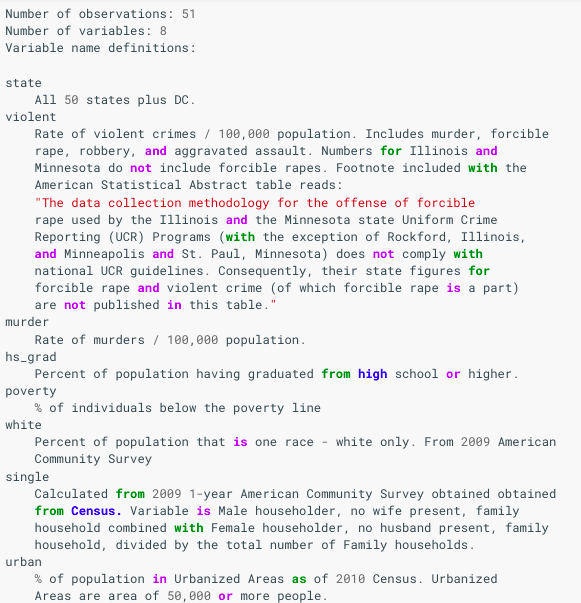

In [ ]:
#Predire le taux de meurtres
statecrime = sm.datasets.statecrime.load_pandas().data
statecrime.head()

#### Exercice 7 : Ducan

Predire "prestige"

In [ ]:
duncan = sm.datasets.get_rdataset("Duncan", "carData")
print(duncan.__doc__)

In [ ]:
df = duncan.data
df.head()

#### Exercice 8 : Travel choice

Comprendre le dataset : https://www.statsmodels.org/dev/datasets/generated/modechoice.html

In [ ]:
data = sm.datasets.modechoice.load_pandas()
modechoice = data.data
modechoice.head()

#### Exercice 9 : Titanic

In [ ]:
titanic = data('titanic')
titanic.rename(columns={'class':'clas'}, inplace = True)
# remplacer yes et no par un binaire dans survived

titanic.head()

In [ ]:
# VARIABLES QUAL sans interac


In [ ]:
# VARIABLES QUAL avec interac

